### Final Assignment Capstone Project – The Battle of Neighborhoods | Finding a Better Place in Stuttgart, Baden Württemberg Germany

In [6]:
import pandas as pd
import numpy as np
import requests

### 1. Data Extraction and Cleaning

In [7]:
# The code was removed by Watson Studio for sharing.

,osm_id,ort,plz,bundesland
0,1104550,Aach,78267,Baden-Württemberg
1,1255910,Aach,54298,Rheinland-Pfalz
2,62564,Aachen,52062,Nordrhein-Westfalen
3,62564,Aachen,52064,Nordrhein-Westfalen
4,62564,Aachen,52066,Nordrhein-Westfalen


In [8]:
df_data_1.head(10)

,osm_id,ort,plz,bundesland
0,1104550,Aach,78267,Baden-Württemberg
1,1255910,Aach,54298,Rheinland-Pfalz
2,62564,Aachen,52062,Nordrhein-Westfalen
3,62564,Aachen,52064,Nordrhein-Westfalen
4,62564,Aachen,52066,Nordrhein-Westfalen
5,62564,Aachen,52068,Nordrhein-Westfalen
6,62564,Aachen,52070,Nordrhein-Westfalen
7,62564,Aachen,52072,Nordrhein-Westfalen
8,62564,Aachen,52074,Nordrhein-Westfalen
9,62564,Aachen,52076,Nordrhein-Westfalen


In [9]:
df= df_data_1[df_data_1.bundesland == 'Baden-Württemberg']

In [10]:
df.head(10)

,osm_id,ort,plz,bundesland
0,1104550,Aach,78267,Baden-Württemberg
12,915486,Aalen,73430,Baden-Württemberg
13,915486,Aalen,73431,Baden-Württemberg
14,915486,Aalen,73432,Baden-Württemberg
15,915486,Aalen,73433,Baden-Württemberg
16,915486,Aalen,73434,Baden-Württemberg
23,410485,Abstatt,74232,Baden-Württemberg
25,915445,Abtsgmünd,73453,Baden-Württemberg
29,2806596,Achberg,88147,Baden-Württemberg
30,452972,Achern,77855,Baden-Württemberg


In [11]:
df.shape

(1303, 4)

In [12]:
len(df['plz'].unique())

1197

We don't need osm_id column:

In [13]:
df.drop('osm_id', axis=1, inplace=True)
df

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ort,plz,bundesland
0,Aach,78267,Baden-Württemberg
12,Aalen,73430,Baden-Württemberg
13,Aalen,73431,Baden-Württemberg
14,Aalen,73432,Baden-Württemberg
15,Aalen,73433,Baden-Württemberg
...,...,...,...
12834,Zimmern unter der Burg,72369,Baden-Württemberg
12867,Zuzenhausen,74939,Baden-Württemberg
12870,Zweiflingen,74639,Baden-Württemberg
12878,Zwiefalten,88529,Baden-Württemberg


We observe especially the Stuttgart: 

In [14]:
df  = df[df.ort == 'Stuttgart']
df.head(12)

,ort,plz,bundesland
11107,Stuttgart,70173,Baden-Württemberg
11108,Stuttgart,70174,Baden-Württemberg
11109,Stuttgart,70176,Baden-Württemberg
11110,Stuttgart,70178,Baden-Württemberg
11111,Stuttgart,70180,Baden-Württemberg
11112,Stuttgart,70182,Baden-Württemberg
11113,Stuttgart,70184,Baden-Württemberg
11114,Stuttgart,70186,Baden-Württemberg
11115,Stuttgart,70188,Baden-Württemberg
11116,Stuttgart,70190,Baden-Württemberg


In [15]:
df.shape

(35, 3)

In [16]:
print(len(df['plz'].unique()))

35


In [17]:
#resetting the index
df = df.reset_index(drop=True)
df

,ort,plz,bundesland
0,Stuttgart,70173,Baden-Württemberg
1,Stuttgart,70174,Baden-Württemberg
2,Stuttgart,70176,Baden-Württemberg
3,Stuttgart,70178,Baden-Württemberg
4,Stuttgart,70180,Baden-Württemberg
5,Stuttgart,70182,Baden-Württemberg
6,Stuttgart,70184,Baden-Württemberg
7,Stuttgart,70186,Baden-Württemberg
8,Stuttgart,70188,Baden-Württemberg
9,Stuttgart,70190,Baden-Württemberg


In [18]:

body = client_73a045acf857471fad3219235d5bf638.get_object(Bucket='capstoneproject-donotdelete-pr-ykxhczocugr3xx',Key='desss.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


,neighbourhood
0,Akademiegarten
1,Goethestraße
2,Elisabethenstraße
3,Hasenbergstraße
4,Fangelsbachstraße


In [19]:
df['neighbourhood'] = df_data_2['neighbourhood']
df

,ort,plz,bundesland,neighbourhood
0,Stuttgart,70173,Baden-Württemberg,Akademiegarten
1,Stuttgart,70174,Baden-Württemberg,Goethestraße
2,Stuttgart,70176,Baden-Württemberg,Elisabethenstraße
3,Stuttgart,70178,Baden-Württemberg,Hasenbergstraße
4,Stuttgart,70180,Baden-Württemberg,Fangelsbachstraße
5,Stuttgart,70182,Baden-Württemberg,Heusteigstraße
6,Stuttgart,70184,Baden-Württemberg,Gröberstraße
7,Stuttgart,70186,Baden-Württemberg,Gröberstraße
8,Stuttgart,70188,Baden-Württemberg,Heubergstraße
9,Stuttgart,70190,Baden-Württemberg,Landhausstraße


installing and importing the important libraries

In [20]:
!pip install geocoder
!pip install folium

In [21]:
import pandas as pd
import requests
import numpy as np
import geocoder
import folium
import requests 
import matplotlib.cm as cm
import matplotlib.colors as colors
import json
import xml
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from pandas.io.json import json_normalize 
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim 
from bs4 import BeautifulSoup

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print("All Required Libraries Imported!")

All Required Libraries Imported!


writing a function to gather the latitude and longitude values:

In [22]:
def get_latilong(postal_code):
    lati_long_coords = None
    while(lati_long_coords is None):
        g = geocoder.arcgis('{}, Stuttgart'.format(postal_code))
        lati_long_coords = g.latlng
    return lati_long_coords
    
get_latilong('70195')

[48.78051000000005, 9.125591482000061]

In [23]:
# Retrieving Postal Code Co-ordinates
postal_codes = df['plz']    
coords = [ get_latilong(plz) for plz in postal_codes.tolist() ]

In [24]:
# Adding Columns Latitude & Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
df['Latitude'] = df_coords['Latitude']
df['Longitude'] = df_coords['Longitude']

In [25]:
df[df.plz == 70173]

,ort,plz,bundesland,neighbourhood,Latitude,Longitude
0,Stuttgart,70173,Baden-Württemberg,Akademiegarten,48.781283,9.180925


In [26]:
df

,ort,plz,bundesland,neighbourhood,Latitude,Longitude
0,Stuttgart,70173,Baden-Württemberg,Akademiegarten,48.781283,9.180925
1,Stuttgart,70174,Baden-Württemberg,Goethestraße,48.782170,9.171039
2,Stuttgart,70176,Baden-Württemberg,Elisabethenstraße,48.777570,9.161918
3,Stuttgart,70178,Baden-Württemberg,Hasenbergstraße,48.768680,9.166271
4,Stuttgart,70180,Baden-Württemberg,Fangelsbachstraße,48.762365,9.172419
5,Stuttgart,70182,Baden-Württemberg,Heusteigstraße,48.773111,9.184390
6,Stuttgart,70184,Baden-Württemberg,Gröberstraße,48.767295,9.188263
7,Stuttgart,70186,Baden-Württemberg,Gröberstraße,48.772835,9.211180
8,Stuttgart,70188,Baden-Württemberg,Heubergstraße,48.786225,9.218000
9,Stuttgart,70190,Baden-Württemberg,Landhausstraße,48.790910,9.203921


installing and importing Nominatim

In [63]:
!conda install -c conda-forge geocoder --yes
import geocoder
from geopy.geocoders import Nominatim

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                                                                      /failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - cffi -> python[version='2.7.*|3.5.*|3.6.*|3.6.9|3.6.9|3.6.9|3.6.9|>=3.6,<3.7.0a0|>=3.9,<3.10.0a0|>=3.8,<3.9.0a0|>=3.7,<3.8.0a0|>=2.7,<2.8.0a0|>=3.5,<3.6.0a0|3.4.*',build='0_73_pypy|3_73_pypy|2_73_pypy|1_73_pypy']
  - rsa -> python[version='2.7.*|3.4.*|3.5.*|3.6.*']

Your python: python=3.7

If python is

In [27]:
#Latitude and Longitude values of Stuttgart
address = 'Stuttgart'

geolocator = Nominatim(user_agent='myuseragent')
location = geolocator.geocode(address)
lat = location.latitude
long = location.longitude
print('The Geograpical Co-ordinate of Stuttgart,Baden-Württemberg are {}, {}.'.format(lat, long))

The Geograpical Co-ordinate of Stuttgart,Baden-Württemberg are 48.7784485, 9.1800132.


### 3. Map of Stuttgart

In [28]:
# İnstalling folium
! pip install folium==0.5.0

In [29]:
map_Stuttgart = folium.Map(location=[lat, long], zoom_start=10)

for lat, long, nei in zip(df['Latitude'], df['Longitude'], df['neighbourhood']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Stuttgart)  
    
map_Stuttgart

In [30]:
# @hiddel_cell
CLIENT_ID = '1DZDZOLM22LYHIZCFWG0KBH3ZRV5R224DM5ICFOVBWFTOLM1' # my Foursquare ID
CLIENT_SECRET = 'WDUY0XGVEMVWRQ00QCQLZ0OV2MFPXI4CJPRBB1KUN2WRT2ZH' # my Foursquare Secret
VERSION = '20180604'
LIMIT = 30
#print('Your credentails:')
#print('CLIENT_ID: '+CLIENT_ID)
#print('CLIENT_SECRET: '+CLIENT_SECRET)

In [31]:
radius = 700 
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat, 
   long, 
    radius, 
   LIMIT)
results = requests.get(url).json()

In [32]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.address', 'venue.location.lat',
       'venue.location.lng', 'venue.location.labeledLatLngs',
       'venue.location.distance', 'venue.location.cc', 'venue.location.city',
       'venue.location.state', 'venue.location.country',
       'venue.location.formattedAddress', 'venue.categories',
       'venue.photos.count', 'venue.photos.groups',
       'venue.location.postalCode'],
      dtype='object')

In [33]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### 4. Nearby Venues/Locations

In [34]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Star Inn Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",48.697273,9.219360
1,Zum Ochsen,"[{'id': '4bf58dd8d48988d10d941735', 'name': 'G...",48.692693,9.215960
2,Filder Imbiss,"[{'id': '4bf58dd8d48988d1df931735', 'name': 'B...",48.693625,9.220562
3,General Aviation Terminal (GAT),"[{'id': '4bf58dd8d48988d1eb931735', 'name': 'A...",48.692079,9.214976


### 5. Categories of Nearby Venues/Locations

In [35]:
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(5)

,name,categories,lat,lng
0,Star Inn Hotel,Hotel,48.697273,9.219360
1,Zum Ochsen,German Restaurant,48.692693,9.215960
2,Filder Imbiss,BBQ Joint,48.693625,9.220562
3,General Aviation Terminal (GAT),Airport Terminal,48.692079,9.214976


In [36]:
# Top 10 Categories
a=pd.Series(nearby_venues.categories)
a.value_counts()[:10]

BBQ Joint            1
Airport Terminal     1
Hotel                1
German Restaurant    1
Name: categories, dtype: int64

In [37]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # making GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [39]:
# Nearby Venues
Scarborough_venues = getNearbyVenues(names=df['neighbourhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Akademiegarten
Goethestraße
Elisabethenstraße
Hasenbergstraße
Fangelsbachstraße
Heusteigstraße
Gröberstraße
Gröberstraße
Heubergstraße
Landhausstraße
Friedhofstraße
Schoderstraße
Falkertstaffel
Talwiesenweg
Herbsthalde
Binsenplattenweg
Abelsberg
Äckerlesweg
Martin-Schrenk-Weg
Allmersbacher Straße
Voltastraße
Kreistel
Alemannenstraße
Rotweg
Edisonstraße
Schraderweg
Haldenweg
Albigenserweg
Jurastraße
Albstadtweg
Halde
Haldenwaldweg
Hauptallee
Birkacher Straße
Flughafen Stuttgart


In [41]:
print('There are {} Uniques Categories.'.format(len(Scarborough_venues['Venue Category'].unique())))
Scarborough_venues.groupby('Neighborhood').count().head()

There are 171 Uniques Categories.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Abelsberg,8,8,8,8,8,8
Akademiegarten,91,91,91,91,91,91
Albigenserweg,29,29,29,29,29,29
Albstadtweg,22,22,22,22,22,22
Alemannenstraße,20,20,20,20,20,20



### One Hot Encoding of Features

In [42]:
# one hot encoding
Scarborough_onehot = pd.get_dummies(Scarborough_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Scarborough_onehot['Neighborhood'] = Scarborough_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Scarborough_onehot.columns[-1]] + list(Scarborough_onehot.columns[:-1])
Scarborough_onehot = Scarborough_onehot[fixed_columns]
Scarborough_grouped = Scarborough_onehot.groupby('Neighborhood').mean().reset_index()
Scarborough_onehot.head(5)

,Neighborhood,African Restaurant,Airport Terminal,American Restaurant,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach Bar,Beer Garden,Beer Store,Big Box Store,Bookstore,Breakfast Spot,Brewery,Burger Joint,Bus Station,Bus Stop,Business Service,Cable Car,Café,Casino,Chinese Restaurant,Cigkofte Place,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Doner Restaurant,Donut Shop,Drugstore,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,German Pop-Up Restaurant,German Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Historic Site,History Museum,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Kebab Restaurant,Korean Restaurant,Lake,Light Rail Station,Liquor Store,Lounge,Market,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nightclub,Opera House,Organic Grocery,Palace,Paper / Office Supplies Store,Park,Pedestrian Plaza,Persian Restaurant,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Pub,Record Shop,Rental Car Location,Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Schnitzel Restaurant,Science Museum,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soup Place,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taverna,Tea Room,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Toy / Game Store,Train Station,Tram Station,Trattoria/Osteria,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Vineyard,Whisky Bar,Wine Bar,Wine Shop,Winery,Zoo Exhibit
0,Akademiegarten,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Akademiegarten,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Akademiegarten,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Akademiegarten,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Akademiegarten,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0

In [43]:
num_top_venues = 5
for hood in Scarborough_grouped['Neighborhood']:
    print("---- "+hood+" ----")
    temp =Scarborough_grouped[Scarborough_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Abelsberg ----
                venue  freq
0   German Restaurant  0.12
1           Gastropub  0.12
2           Wine Shop  0.12
3  Light Rail Station  0.12
4    Doner Restaurant  0.12


---- Akademiegarten ----
                venue  freq
0   German Restaurant  0.08
1               Hotel  0.07
2               Plaza  0.05
3  Italian Restaurant  0.04
4                 Bar  0.04


---- Albigenserweg ----
                venue  freq
0           Gastropub  0.07
1    Asian Restaurant  0.07
2   German Restaurant  0.07
3  Italian Restaurant  0.07
4       Big Box Store  0.03


---- Albstadtweg ----
           venue  freq
0        Theater  0.14
1          Hotel  0.14
2         Casino  0.09
3  Metro Station  0.09
4         Bakery  0.05


---- Alemannenstraße ----
               venue  freq
0           Bus Stop  0.10
1              Hotel  0.10
2  German Restaurant  0.05
3        Supermarket  0.05
4       Climbing Gym  0.05


---- Allmersbacher Straße ----
                venue  freq
0       Me

In [44]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Most Common venues near neighborhood

In [45]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Scarborough_grouped['Neighborhood']

for ind in np.arange(Scarborough_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Scarborough_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abelsberg,Bakery,Wine Shop,Gastropub,Doner Restaurant,Big Box Store,Plaza,Light Rail Station,German Restaurant,Flower Shop,French Restaurant
1,Akademiegarten,German Restaurant,Hotel,Plaza,Italian Restaurant,Bar,History Museum,Park,Café,Coffee Shop,Supermarket
2,Albigenserweg,Gastropub,German Restaurant,Italian Restaurant,Asian Restaurant,Ice Cream Shop,Sushi Restaurant,Mexican Restaurant,Miscellaneous Shop,Movie Theater,Chinese Restaurant
3,Albstadtweg,Hotel,Theater,Casino,Metro Station,Italian Restaurant,Gym / Fitness Center,Bus Stop,Spa,Chinese Restaurant,Multiplex
4,Alemannenstraße,Hotel,Bus Stop,Theme Park,Light Rail Station,Museum,Burger Joint,Supermarket,Modern European Restaurant,Climbing Gym,Food & Drink Shop


### K-Means Clustering Approach

In [46]:
# Using K-Means to cluster neighborhood into 3 clusters
Scarborough_grouped_clustering = Scarborough_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=3, random_state=0).fit(Scarborough_grouped_clustering)
kmeans.labels_

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 2], dtype=int32)

In [55]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels 4', kmeans.labels_)

Scarborough_merged =df.iloc[:16,:]

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Scarborough_merged = Scarborough_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='neighbourhood')

Scarborough_merged.head()# check the last columns!

,ort,plz,bundesland,neighbourhood,Latitude,Longitude,Cluster Labels 4,Cluster Labels 3,Cluster Labels 2,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Stuttgart,70173,Baden-Württemberg,Akademiegarten,48.781283,9.180925,0,0,0,0,German Restaurant,Hotel,Plaza,Italian Restaurant,Bar,History Museum,Park,Café,Coffee Shop,Supermarket
1,Stuttgart,70174,Baden-Württemberg,Goethestraße,48.782170,9.171039,0,0,0,0,Italian Restaurant,Concert Hall,German Restaurant,Movie Theater,Nightclub,Bar,Hotel,Plaza,Sushi Restaurant,Pub
2,Stuttgart,70176,Baden-Württemberg,Elisabethenstraße,48.777570,9.161918,0,0,0,0,Café,Italian Restaurant,Concert Hall,Supermarket,German Restaurant,Gym / Fitness Center,Grocery Store,Greek Restaurant,Gastropub,Hotel
3,Stuttgart,70178,Baden-Württemberg,Hasenbergstraße,48.768680,9.166271,0,0,0,0,Café,Bar,German Restaurant,Italian Restaurant,Turkish Restaurant,Supermarket,Burger Joint,Drugstore,Japanese Restaurant,Ice Cream Shop
4,Stuttgart,70180,Baden-Württemberg,Fangelsbachstraße,48.762365,9.172419,0,0,0,0,Café,German Restaurant,Italian Restaurant,Bar,Supermarket,Restaurant,Vietnamese Restaurant,Plaza,Burger Joint,Spanish Restaurant


### Map of Clusters

In [56]:
kclusters = 10

In [57]:
# create map
map_clusters = folium.Map(location=[lat, long], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map

markers_colors = []
for lat, lon, nei , cluster in zip(Scarborough_merged['Latitude'], 
                                   Scarborough_merged['Longitude'], 
                                   Scarborough_merged['neighbourhood'], 
                                   Scarborough_merged['Cluster Labels 4']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#4856fb', '#10a2f0', '#2adddd', '#62fbc4', '#9cfba4', '#d4dd80', '#ffa256', '#ff562c', '#ff0000']


In [58]:
df1=Scarborough_merged.loc[Scarborough_merged['Cluster Labels 4'] == 0,Scarborough_merged.columns[[2] + list(range(5, Scarborough_merged.shape[1]))]]
df2=Scarborough_merged.loc[Scarborough_merged['Cluster Labels 4'] == 1,Scarborough_merged.columns[[2] + list(range(5, Scarborough_merged.shape[1]))]]
df3=Scarborough_merged.loc[Scarborough_merged['Cluster Labels 4'] == 2,Scarborough_merged.columns[[2] + list(range(5, Scarborough_merged.shape[1]))]]

In [61]:
Scarborough_Avg_HousingPrice=pd.DataFrame({"Neighborhood":df["neighbourhood"],
                                      "Average_Housing_Price":[335000.0,286600.0,175000.0,225900.0,219400.0,
                                                               573900.0,225000.0,370500.0,370500.0,433500.0,279200.0,
                                                               279200.0,225000.0,370500.,255400.0,433500.0,433500.0,
                                                               435000.0,289500.0,265000.0,285900.0,239400.0,
                                                               589900.0,295000.0,380500.0,378500.0,438500.0,229200.0,
                                                               229200.0,365000.0,388500.,285400.0,493500.0,477500.0,378000.0
                                                              ]})

In [62]:
Scarborough_Avg_HousingPrice.set_index('Neighborhood',inplace=True,drop=True)

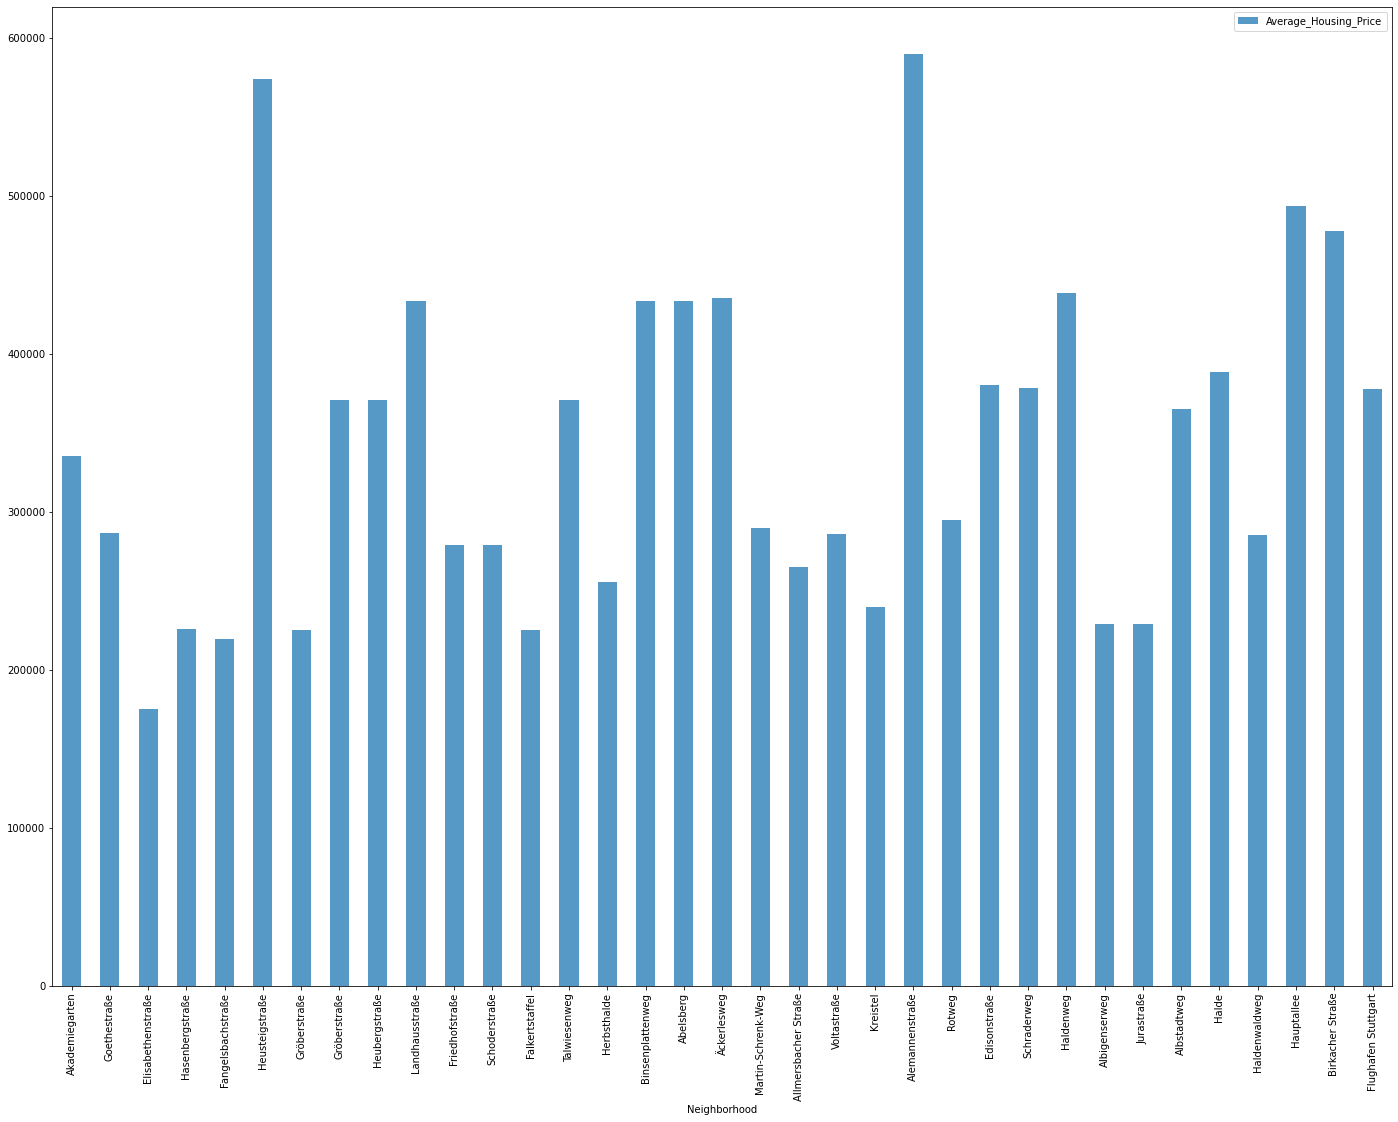

In [63]:
Scarborough_Avg_HousingPrice.plot(kind='bar',figsize=(24,18),alpha=0.75)

### School Rating by Clusters

#### Conclusion: 
In this project, using k-means cluster algorithm I separated the neighborhood into 10(Ten) different clusters and for 35 different lattitude and logitude from dataset, which have very-similar neighborhoods around them. Using the charts above results presented to a particular neighborhood based on average house prices have been made.